<a href="https://colab.research.google.com/github/evgeniytr1509/HW_DS_10/blob/main/DS_HW_10_ver_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from keras import layers
from keras import models
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist

Загрузка данных из Fashion MNIST

In [50]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train original shape (60000, 28, 28)
y_train original shape (60000,)


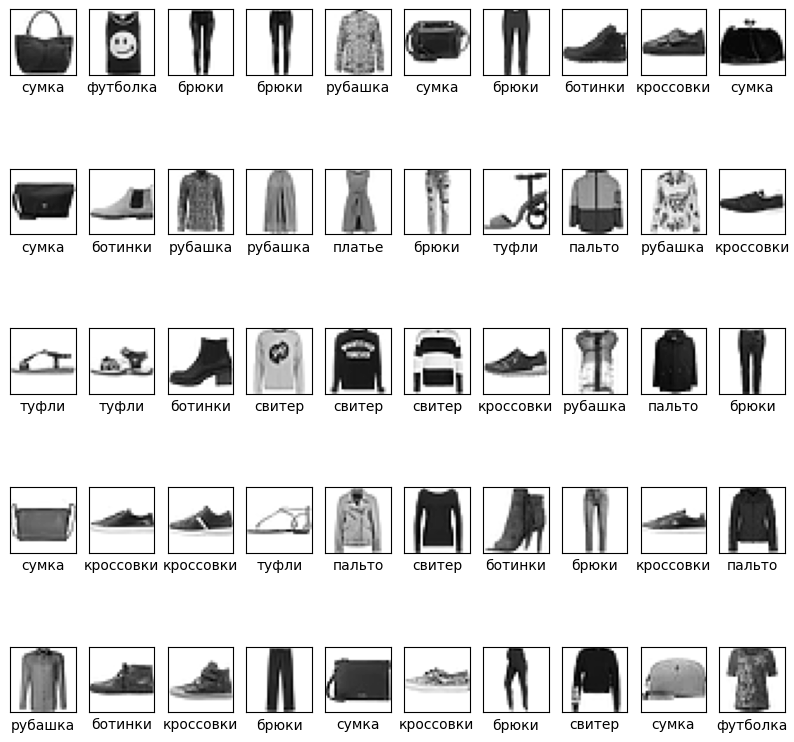

In [51]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [52]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [53]:
# Преобразование размерности изображений
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Преобразуем из  (28, 28) в (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

y_train = utils.to_categorical(y_train, 10)
y_valid = utils.to_categorical(y_valid, 10)
y_test = utils.to_categorical(y_test, 10)

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


Определение архитектуры нейросети

In [54]:
model = models.Sequential([
      layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.3),
      layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.3),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])

Параметры нейросети

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 7, 7, 32)         

Компиляции модели перед началом процесса обучения.

In [56]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [57]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

Обучение модели

In [58]:
from keras.callbacks import ModelCheckpoint

history = model.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=10,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpointer])

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.5980 - accuracy: 0.7786
Epoch 1: val_loss improved from inf to 0.38818, saving model to model.weights.best.hdf5
860/860 [==============================] - 75s 86ms/step - loss: 0.5979 - accuracy: 0.7786 - val_loss: 0.3882 - val_accuracy: 0.8612
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4115 - accuracy: 0.8505
Epoch 2: val_loss improved from 0.38818 to 0.32289, saving model to model.weights.best.hdf5
860/860 [==============================] - 72s 84ms/step - loss: 0.4114 - accuracy: 0.8505 - val_loss: 0.3229 - val_accuracy: 0.8834
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3686 - accuracy: 0.8656
Epoch 3: val_loss improved from 0.32289 to 0.28467, saving model to model.weights.best.hdf5
860/860 [==============================] - 72s 84ms/step - loss: 0.3686 - accuracy: 0.8656 - val_loss: 0.2847 - val_accuracy: 0.8992
Epoch 4/10
859/860 [=====================

Загрузка оптимальных весов

In [59]:
model.load_weights('model.weights.best.hdf5')

Оценка нейросети на тестовых данных

In [60]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', round(score[1], 2))


 Test accuracy: 0.91


Вывод: Точность построенной нейросети выше, чем в предыдущем ДЗ

Получение прогнозов на тестовых данных

In [61]:
y_hat = model.predict(x_test)

313/313 [==============================] - 4s 14ms/step


Предсказание модели на тестовых данных. Визуализация случайных изображений из тестового набора.

313/313 [==============================] - 3s 10ms/step


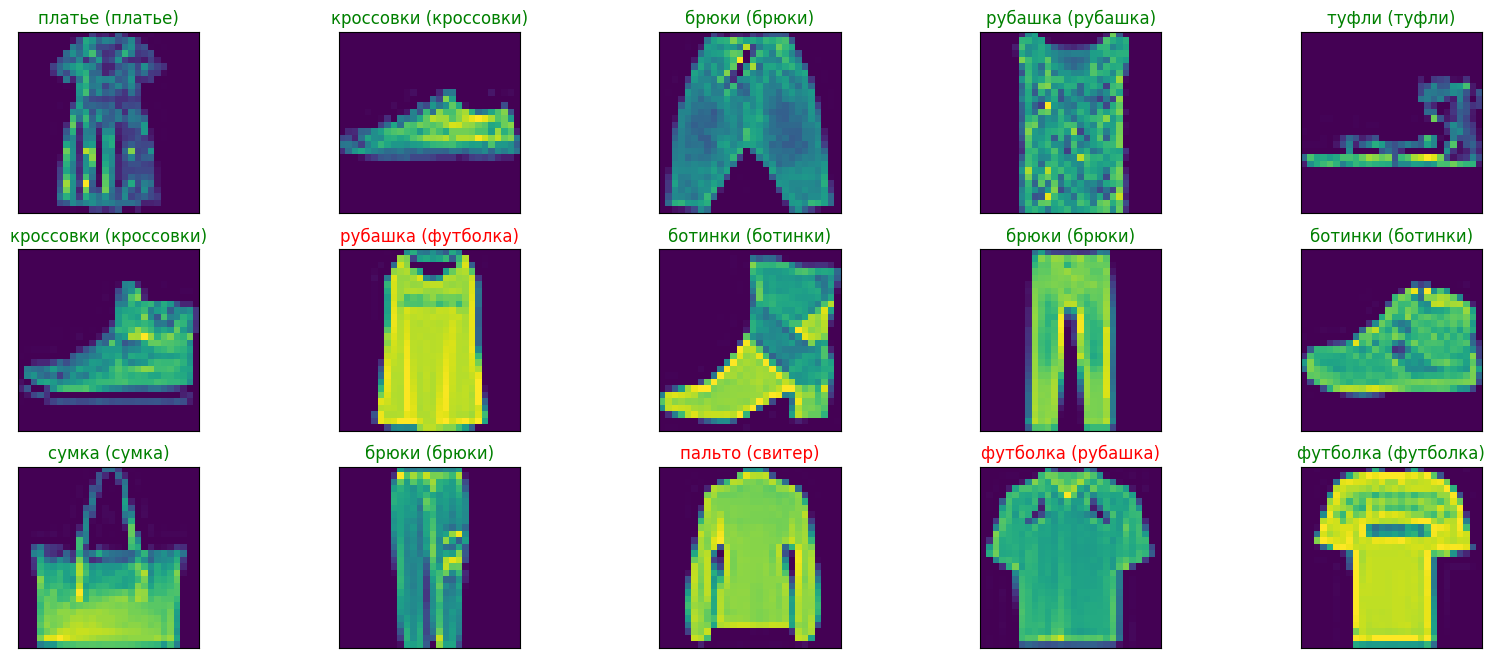

In [63]:
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])

    ax.set_title("{} ({})".format(classes[predict_index],
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Вывод: Заголовок содержит предсказанный и истинный класс. Заголовок окрашивается в зеленый, если предсказанный и истинный классы совпадают, в красный - если не совпадают.
Таким образом, весь код выполняет визуальный анализ результатов предсказания модели для случайных изображений из тестового набора данных.

Извлечение истории обучения, построение графиков

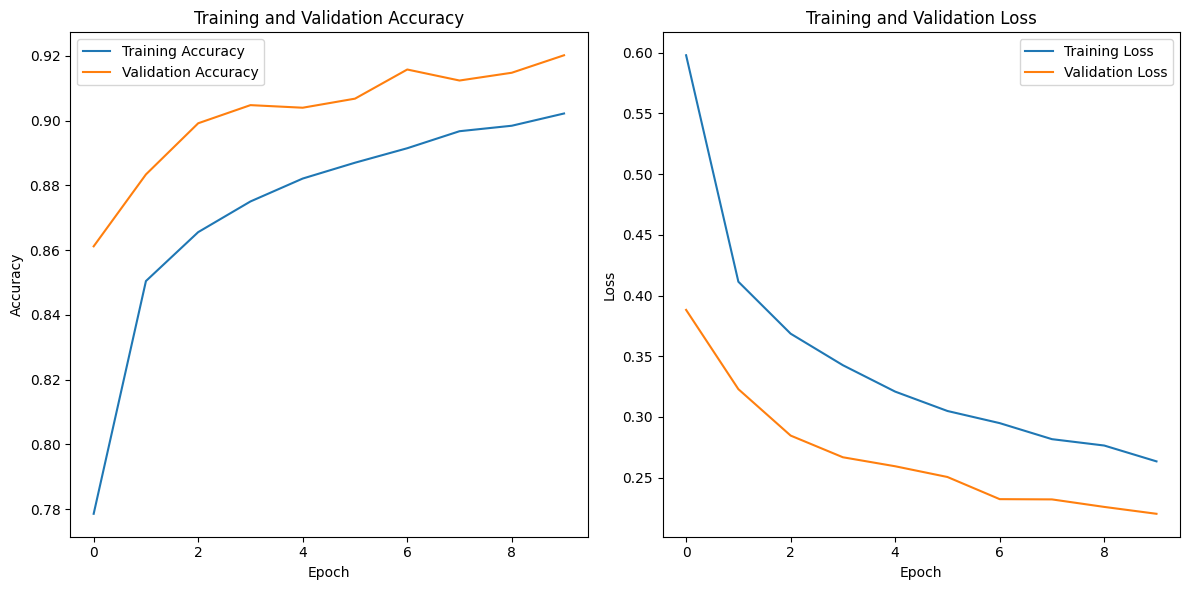

In [64]:

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


Вывод 1: На графике 1 наблюдается увеличение точности на тренировочном наборе данных в процессе обучения модели. Если точность снижается, это свидетельствует о переобучении.

Вывод 2: На графике 2 наблюдается снижение потерь на тренировочном наборе данных в процессе обучения модели. Если потери увеличиваются, это свидетельствует о переобучении.